In [64]:
import pandas as pd
import seaborn as sns
import random
import math
from sklearn import datasets, linear_model
import matplotlib.pyplot as plt


In [65]:
df = pd.read_csv('SalariesSimple.csv')
print(df)

      total_experience_years  annual_base_pay
0                       13.0         125000.0
1                       15.0          65000.0
2                        4.0          86000.0
3                        4.0         105000.0
4                        4.0         110000.0
...                      ...              ...
1650                     1.0          60500.0
1651                     6.0         164000.0
1652                     7.0         150000.0
1653                     5.0          75000.0
1654                     2.0             50.0

[1655 rows x 2 columns]


In [66]:
df.dropna(axis=0, inplace=True)
df = df[(df['annual_base_pay'] >15000) & (df['total_experience_years']>0)]
df = df[(df['total_experience_years'] < 30)]
df.drop(df[df['annual_base_pay']>= 200000].index, inplace=True)

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1374 entries, 0 to 1653
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   total_experience_years  1374 non-null   float64
 1   annual_base_pay         1374 non-null   float64
dtypes: float64(2)
memory usage: 32.2 KB


In [68]:
df.describe()

,total_experience_years,annual_base_pay
count,1374.000000,1374.000000
mean,6.709483,97196.241063
std,4.885827,40736.641199
min,0.500000,16543.000000
25%,3.000000,65000.000000
50%,5.000000,99750.000000
75%,10.000000,126750.000000
max,26.000000,198000.000000


<Axes: xlabel='total_experience_years', ylabel='annual_base_pay'>

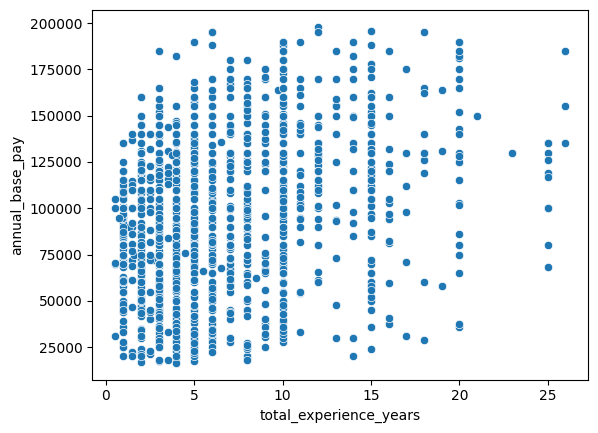

In [69]:
sns.scatterplot(data=df, x='total_experience_years', y="annual_base_pay")

In [70]:
df = df[(df['annual_base_pay'] >15000) & (df['total_experience_years']>0)]
print(df['annual_base_pay'].max())

198000.0


In [71]:
def testTrainSplit(data):
    length = len(df.index)
    splitLimit = int(length * 0.7)
    train = data[0: splitLimit]
    test = data[splitLimit + 1: length]
    return train, test

In [72]:
train, test = testTrainSplit(df)

In [73]:
def sumOfDistances(a, b, c, trainDF):
    sum = 0
    for row in range(0, len(trainDF.index)):
        exp = trainDF.iat[row, 0]
        pay = trainDF.iat[row, 1]
        distance = abs((a*exp) + (b*pay) + c) / math.sqrt((a*a) + (b*b))
        sum = sum + distance
    return sum

In [74]:
def trainLinearRegression(trainDF):
    count = 0
    slopes = {}
    while count < 1000:
        a = random.randint(15000, 20000) # Slope!
        b = -1 # Coefficient to y --> by = ax + c --> negative because we move to other side
        c = 900 # Y-intercept
        count = count + 1
        sum = sumOfDistances(a, b, c, train)
        slopes[a] = sum
    return slopes

In [75]:
trainSlopes = trainLinearRegression(train)
print(trainSlopes)

{17644: 3324.6665782013592, 17851: 3324.338930417708, 15420: 3401.922737334059, 17403: 3326.212393520407, 19104: 3342.6403555545785, 15206: 3417.282944076925, 18897: 3337.2961957822904, 16602: 3343.043564589692, 19301: 3347.7301846161226, 18293: 3327.1003186498024, 15251: 3413.9051765835716, 19855: 3364.0610110946536, 19654: 3358.0973010364182, 15938: 3371.1901100665395, 18716: 3333.2084628634816, 15339: 3407.5363197682905, 18214: 3326.373696534878, 15752: 3381.2385254363044, 17571: 3325.0869982005215, 17243: 3328.325296264438, 15497: 3396.8178776798127, 17362: 3326.6959719039314, 15615: 3389.2667314424625, 16510: 3346.138426327275, 18096: 3325.5334962485713, 18509: 3329.638254365634, 16661: 3341.1628917670564, 16503: 3346.391491159947, 17351: 3326.837141613234, 17872: 3324.389081635769, 16966: 3333.3101227021684, 19070: 3341.766055185191, 16810: 3336.883784696435, 16238: 3357.015394545556, 19336: 3348.6784233247913, 15957: 3370.2188916711752, 17714: 3324.374873329869, 16625: 3342.3001

In [76]:
temp = min(trainSlopes.values())
res = [key for key in trainSlopes if trainSlopes[key] == temp]
 
print("slope: " + str(res[0]))
print("distace: " + str(temp))

slope: 17807
distace: 3324.291647478953


In [77]:
a = 18137
b = -1
c = 900
prediction = []
#ax +by = c
for row in range(0, len(test.index)):
    exp = test.iat[row, 0]
    prediction.append((c - (a * exp))/ b)
print(prediction)

[107922.0, 28119.2, 126059.0, 17237.0, 71648.0, 53511.0, 144196.0, 17237.0, 26305.5, 198607.0, 180470.0, 126059.0, 35374.0, 35374.0, 144196.0, 71648.0, 271155.0, 35374.0, 53511.0, 271155.0, 162333.0, 53511.0, 35374.0, 53511.0, 271155.0, 180470.0, 44442.5, 144196.0, 89785.0, 180470.0, 26305.5, 35374.0, 35374.0, 53511.0, 53511.0, 325566.0, 361840.0, 35374.0, 107922.0, 89785.0, 71648.0, 253018.0, 8168.5, 452525.0, 53511.0, 44442.5, 71648.0, 89785.0, 71648.0, 216744.0, 180470.0, 71648.0, 35374.0, 180470.0, 17237.0, 53511.0, 17237.0, 17237.0, 26305.5, 198607.0, 180470.0, 180470.0, 271155.0, 180470.0, 53511.0, 162333.0, 89785.0, 107922.0, 180470.0, 89785.0, 89785.0, 107922.0, 216744.0, 35374.0, 35374.0, 35374.0, 107922.0, 53511.0, 35374.0, 26305.5, 180470.0, 180470.0, 53511.0, 361840.0, 53511.0, 35374.0, 44442.5, 144196.0, 71648.0, 144196.0, 107922.0, 89785.0, 35374.0, 53511.0, 71648.0, 89785.0, 53511.0, 71648.0, 53511.0, 71648.0, 343703.0, 89785.0, 107922.0, 26305.5, 35374.0, 126059.0, 6257

In [78]:
actual = [row for row in test.iloc[:, 1]]
print(actual)

[45000.0, 74500.0, 145000.0, 62000.0, 120000.0, 150000.0, 153000.0, 58000.0, 112500.0, 130000.0, 120000.0, 72485.0, 44000.0, 44000.0, 156800.0, 75000.0, 58000.0, 130000.0, 105000.0, 150000.0, 171000.0, 48500.0, 75000.0, 125000.0, 125000.0, 165000.0, 117000.0, 72000.0, 119000.0, 120000.0, 22310.0, 61000.0, 120000.0, 120000.0, 120000.0, 140000.0, 80000.0, 65000.0, 70000.0, 40000.0, 135000.0, 120000.0, 100000.0, 135000.0, 130000.0, 123000.0, 103000.0, 77000.0, 69000.0, 101000.0, 106000.0, 100000.0, 120500.0, 140000.0, 114500.0, 70000.0, 112500.0, 100000.0, 110000.0, 155000.0, 190000.0, 160000.0, 132000.0, 125000.0, 97000.0, 30500.0, 159500.0, 160000.0, 141000.0, 190000.0, 130000.0, 90000.0, 115000.0, 57516.0, 75000.0, 64000.0, 140000.0, 18000.0, 100000.0, 77000.0, 128000.0, 150000.0, 126000.0, 175000.0, 65000.0, 92000.0, 21027.0, 140000.0, 110000.0, 130000.0, 155000.0, 135000.0, 140000.0, 110000.0, 50000.0, 95000.0, 58000.0, 66000.0, 89000.0, 128000.0, 164000.0, 32000.0, 40000.0, 110000.0

In [79]:
for i in range(len(test)):
    mse = ((actual[i] - prediction[i])**2)/len(train)
print(mse)

227467.45577523412


In [80]:
prediction24 = ((c - (a * 24))/ b)
print(prediction24)

434388.0


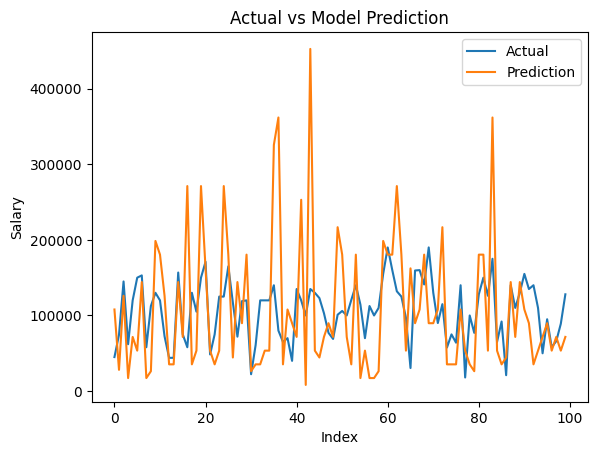

In [81]:
plt.plot([x for x in range(100)], actual[:100], label='Actual')
plt.plot([x for x in range(100)], prediction[:100], label='Prediction')
plt.xlabel('Index')
plt.ylabel('Salary')
plt.title('Actual vs Model Prediction')

plt.legend()
plt.show()